In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utils
import matplotlib.pyplot as plt
import numpy as np

/Users/amyguan/miniforge3/envs/weaver/lib/python3.11/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


In [11]:
dataset = utils.load_dataset('pnsahoo/MATH500_with_Llama_3.1_70B_Instruct_v1_truncated_K_50')

In [13]:
dev_ds, val_ds, test_ds = utils.dev_test_split(dataset, test_size=0.8, val_size=0.1, hub_name="amyguan/math500-k50-80-10-10")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

No files have been modified since last commit. Skipping to prevent empty commit.


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

In [67]:
dev_ds, val_ds, test_ds = utils.dev_test_split(dataset, test_size=0.94, val_size=0.05, hub_name="amyguan/math500-k50-1-5-94")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

In [68]:
dev_ds

Dataset({
    features: ['problem', 'solution', 'answer', 'subject', 'level', 'unique_id', 'instruction', 'samples', 'extracted_answers', 'answer_correct', 'DeepSeekLlama70B_verdicts', 'DeepSeekQwen32B_verdicts', 'Llama-3.3-70B-Instruct_verdicts', 'Qwen/Qwen2.5-72B-Instruct_verdicts', 'Mixtral-8x22B-Instruct-v0.1_verdicts', 'Meta-Llama-3.1-405B-Instruct-quantized.w8a16_verdicts', 'WizardLM-2-8x22B_verdicts', 'SkyT1_verdicts', 'GRM_scores', 'Skyworks_scores', 'URM_scores', 'QRM_scores', 'GPM_scores', 'GRMLlama32_scores', 'OffsetBias_scores', 'GRMGemma_scores', 'ArmorRM_scores', 'QwenPRM_min_scores', 'QwenPRM_max_scores', 'QwenPRM_avg_scores', 'EurusPRMStage1_min_scores', 'EurusPRMStage1_max_scores', 'EurusPRMStage1_avg_scores', 'EurusPRMStage2_min_scores', 'EurusPRMStage2_max_scores', 'EurusPRMStage2_avg_scores', 'QRMGemma_scores', 'InternLM2Reward7B_scores', 'Qwen72B_scores', 'SkyworksGemma_scores', 'LDLRewardGemma_scores', 'InternLM2RewardModel_scores', 'INFORM_scores', 'DecisionTreeR

In [7]:
scores_matrix, verifier_names = utils.extract_scores_matrix(dev_ds)
similarities = utils.similarities_dict(scores_matrix)
utilities = utils.utilities_dict(scores_matrix, dev_ds, verifier_names)
param_counts = utils.costs_dict(verifier_names)

Number of verifiers: 35
Ground truth shape: (4500,)
Overall accuracy: 0.798
Built parameter count vector. Missing: 0 of 35


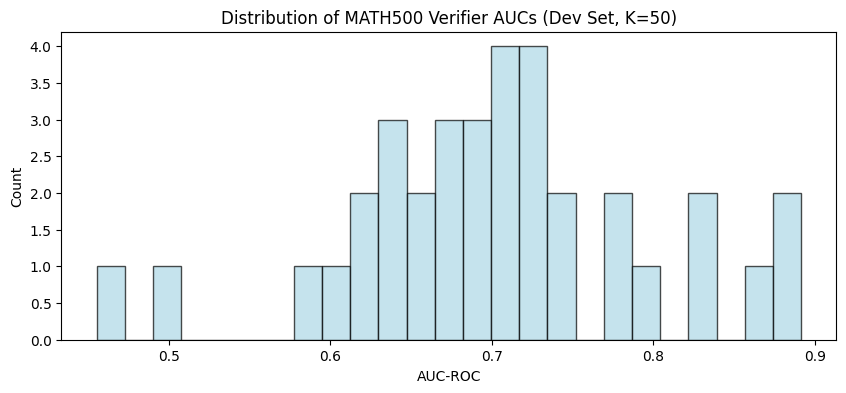

In [17]:
plt.figure(figsize=(10,4))
plt.hist([u for u in utilities if not np.isnan(u)], bins=25, color='lightblue', alpha=0.7, edgecolor='black')
plt.xlabel("AUC-ROC")
plt.ylabel("Count")
plt.title("Distribution of MATH500 Verifier AUCs (Dev Set, K=50)")
plt.show()

In [18]:
selected = utils.greedy_select(utilities,
    similarities['pearson'],
    verifier_names,
    k=10, # number of verifiers to select
    alpha=1.0, # utility weight
    beta=1.0, # similarity weight
    gamma=1.0, # parameter cost weight
    param_counts=param_counts)

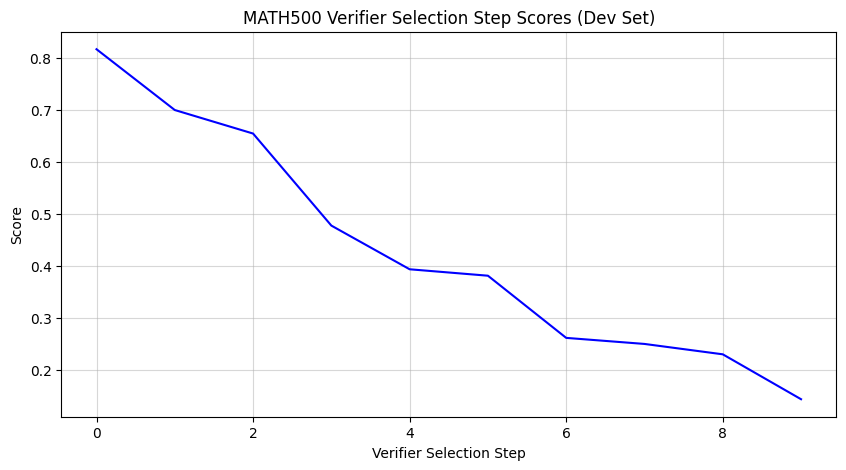

In [19]:
plt.figure(figsize=(10,5))
plt.plot(selected['step_scores'], color='blue')
plt.xlabel("Verifier Selection Step")
plt.ylabel("Score")
plt.title("MATH500 Verifier Selection Step Scores (Dev Set)")
plt.grid(True, alpha=0.5)
plt.show()

# PLOTTING FINAL RESULTS

In [57]:
import pandas as pd

df = pd.read_csv('../results/hparam_search_summary_val.csv', usecols=['k', 'alpha', 'beta', 'gamma', 'train_select_accuracy', 'train_sample_accuracy', 'train_top1_accuracy', 'verifiers'])
md = df.to_markdown(index=False)
print(md)

|   train_select_accuracy |   train_sample_accuracy |   train_top1_accuracy | verifiers                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |   k |   alpha |   beta |   gamma |
|----------------------

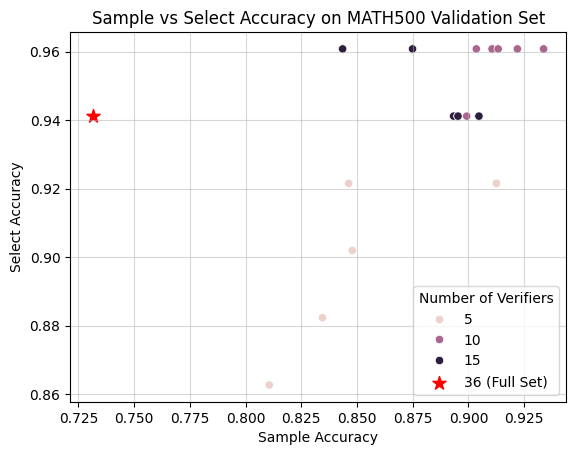

In [66]:
import seaborn as sns

sns.scatterplot(x='train_sample_accuracy', y='train_select_accuracy', data=df[df['k'] < 36], hue='k')
plt.scatter(df[df['k'] == 36]['train_sample_accuracy'], df[df['k'] == 36]['train_select_accuracy'], color='red', marker='*', s=100, label='36 (Full Set)')
plt.xlabel("Sample Accuracy")
plt.ylabel("Select Accuracy")
plt.legend(title='Number of Verifiers', loc='lower right')
plt.title("Sample vs Select Accuracy on MATH500 Validation Set")
plt.grid(True, alpha=0.5)
plt.show()

In [64]:
sorted = df.sort_values(by='train_sample_accuracy', ascending=False)
print(sorted.to_markdown(index=False))

|   train_select_accuracy |   train_sample_accuracy |   train_top1_accuracy | verifiers                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |   k |   alpha |   beta |   gamma |
|----------------------

In [41]:
### DEV SET ###
df = pd.read_csv('../results/hparam_search_summary_dev.csv', usecols=['k', 'alpha', 'beta', 'gamma', 'train_select_accuracy', 'train_sample_accuracy', 'train_top1_accuracy', 'verifiers'])
md = df.to_markdown(index=False)
print(md)

|   train_select_accuracy |   train_sample_accuracy |   train_top1_accuracy | verifiers                                                                                                                                                                                                                                                                                                                                                                                               |   k |   alpha |   beta |   gamma |
|------------------------:|------------------------:|----------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----:|--------:|------

In [42]:
sorted = df.sort_values(by='train_sample_accuracy', ascending=False)
print(sorted.to_markdown(index=False))

|   train_select_accuracy |   train_sample_accuracy |   train_top1_accuracy | verifiers                                                                                                                                                                                                                                                                                                                                                                                               |   k |   alpha |   beta |   gamma |
|------------------------:|------------------------:|----------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----:|--------:|------